In [2]:
import pandas as pd

df = pd.read_csv("dataset_tomat.csv")
df

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor
4,92,9.0,5.0,0.87,Ekspor
...,...,...,...,...,...
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri


In [3]:
df.head()

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor
4,92,9.0,5.0,0.87,Ekspor


In [4]:
df.tail()

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri
89,198,3.6,2.6,0.54,Industri


In [5]:
df.columns

Index(['berat', 'kekenyalan', 'kadar_gula', 'tebal_kulit', 'grade'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   berat        90 non-null     int64  
 1   kekenyalan   90 non-null     float64
 2   kadar_gula   90 non-null     float64
 3   tebal_kulit  90 non-null     float64
 4   grade        90 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [7]:
df.describe()

,berat,kekenyalan,kadar_gula,tebal_kulit
count,90.000000,90.000000,90.000000,90.000000
mean,142.388889,6.547778,3.956667,0.721778
std,37.919398,1.933456,0.785265,0.126461
min,85.000000,3.400000,2.600000,0.510000
25%,104.250000,4.525000,3.225000,0.592500
50%,143.000000,6.850000,4.000000,0.730000
75%,175.500000,8.375000,4.700000,0.847500
max,210.000000,9.400000,5.200000,0.920000


In [8]:
df["grade"].value_counts()

grade
Ekspor           30
Lokal Premium    30
Industri         30
Name: count, dtype: int64

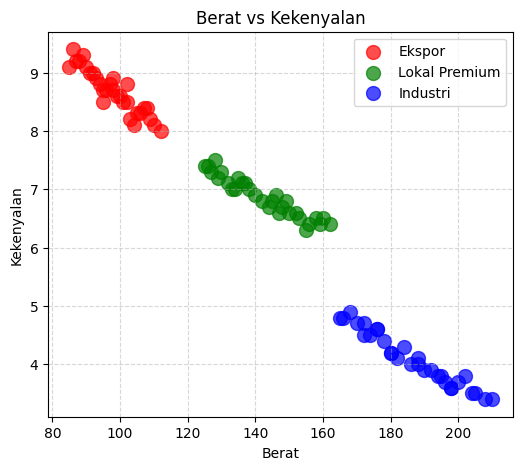

In [9]:
import matplotlib.pyplot as plt

ekspor = df[df["grade"]=="Ekspor"]
lokal_premium = df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

plt.figure(figsize=(6,5))

plt.scatter(ekspor["berat"], ekspor["kekenyalan"], s=100, alpha=0.7, color="red", label="Ekspor")
plt.scatter(lokal_premium["berat"], lokal_premium["kekenyalan"], s=100, alpha=0.7, color="green", label="Lokal Premium")
plt.scatter(industri["berat"], industri["kekenyalan"], s=100, alpha=0.7, color="blue", label="Industri")

plt.xlabel("Berat")
plt.ylabel("Kekenyalan")
plt.title("Berat vs Kekenyalan")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

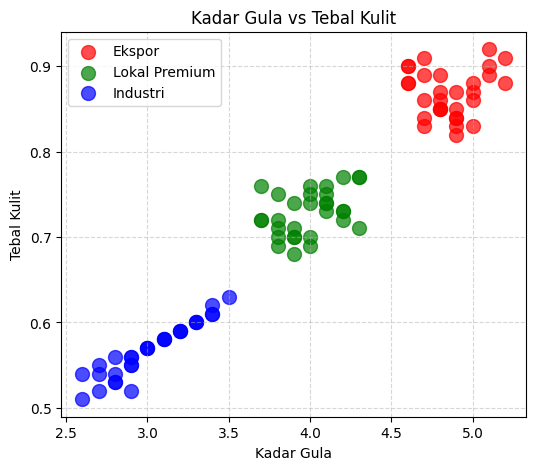

In [10]:
import matplotlib.pyplot as plt

ekspor = df[df["grade"]=="Ekspor"]
lokal_premium = df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

plt.figure(figsize=(6,5))

plt.scatter(ekspor["kadar_gula"], ekspor["tebal_kulit"], s=100, alpha=0.7, color="red", label="Ekspor")
plt.scatter(lokal_premium["kadar_gula"], lokal_premium["tebal_kulit"], s=100, alpha=0.7, color="green", label="Lokal Premium")
plt.scatter(industri["kadar_gula"], industri["tebal_kulit"], s=100, alpha=0.7, color="blue", label="Industri")

plt.xlabel("Kadar Gula")
plt.ylabel("Tebal Kulit")
plt.title("Kadar Gula vs Tebal Kulit")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df[["berat","kekenyalan","kadar_gula","tebal_kulit"]]
y = df["grade"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy : ", accuracy_score(y_pred, y_test))

Accuracy :  1.0


In [12]:
import pandas as pd

data_baru = pd.DataFrame([[92,9,5,0.8]], columns=["berat","kekenyalan","kadar_gula","tebal_kulit"])
data_baru_scaled = scaler.transform(data_baru)
prediksi = model.predict(data_baru_scaled)[0]
presentase = max(model.predict_proba(data_baru_scaled)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi Ekspor dengan tingkat keyakinan 93.20%


In [13]:
import joblib

joblib.dump(model, "model_klasifikasi_tomat.joblib")
joblib.dump(scaler, "scaler_klasifikasi_tomat.joblib")

['scaler_klasifikasi_tomat.joblib']

### Percobaan Menggunakan Pipeline

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df[["berat","kekenyalan","kadar_gula","tebal_kulit"]]
y = df["grade"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
print("Accuracy :", accuracy_score(y_pred, y_test))

# ada built-in method 
# print("Accuracy :", model.score(X_test, y_test))

Accuracy : 1.0


In [17]:
import joblib

joblib.dump(model_pipeline, "model_pipeline_klasifikasi_tomat.joblib")

['model_pipeline_klasifikasi_tomat.joblib']

In [18]:
import joblib
import pandas as pd

model_pipeline = joblib.load("model_pipeline_klasifikasi_tomat.joblib")

data_baru = pd.DataFrame([[100,8.5,3.5,0.7]], columns=["berat","kekenyalan","kadar_gula","tebal_kulit"])
model_pipeline.predict(data_baru)[0]

'Lokal Premium'